In [27]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

# Data
x = torch.randn(1000, 10) # 1000 samples, 10 features
y = torch.randn(1000, 1) # labels

In [28]:
dataset = TensorDataset(x,y)
batch_size = 20
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle = True)

for i, (inputs, labels) in enumerate(data_loader):
    print(f"Batch {i+1}:")
    print("Inputs:", inputs)
    print("Labels:", labels)
    print()

Batch 1:
Inputs: tensor([[ 4.9215e-01,  5.6591e-01, -1.6244e+00, -7.7386e-02, -1.9893e+00,
         -1.3771e+00, -2.7266e-01,  8.1027e-01,  2.6667e-02, -7.2467e-01],
        [ 7.3232e-01,  4.0239e-01, -1.4209e+00, -1.1586e-01,  6.3504e-01,
         -3.1752e-01, -2.9075e-01,  3.1827e-01, -2.7093e-01, -1.5309e+00],
        [ 1.9542e+00,  1.1063e+00,  9.2200e-01,  1.4761e-01, -8.0631e-01,
          7.6677e-01,  1.1144e+00,  1.0078e+00,  8.5786e-01, -8.9520e-01],
        [ 6.9809e-01, -1.8200e-01,  6.7407e-01, -7.1233e-02, -1.0719e-01,
          8.1163e-01, -5.1706e-01, -2.9780e-01, -1.2682e+00, -2.1051e+00],
        [ 2.8327e-01,  6.6913e-01,  5.1413e-01, -1.9722e-01, -2.6883e-01,
         -1.6445e+00, -3.1250e-01, -9.5853e-01, -1.9927e-01,  3.5431e-01],
        [-7.3319e-01,  1.8119e+00, -2.5030e-02, -5.5408e-02,  1.0992e+00,
         -1.6838e-01, -8.4397e-01,  5.9582e-01, -1.7590e+00,  1.6236e+00],
        [-5.1672e-01, -7.1894e-01, -1.4062e-01, -1.8859e+00,  8.8924e-02,
          2.247

In [29]:
# Network
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.linear(x)
    
model = SimpleNet()

In [30]:
# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [41]:
# Training
epochs = 10

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    model.train()

    for batch in data_loader:
        inputs, labels = batch

        predictions = model(inputs) # Forward pass

        loss = loss_fn(predictions, labels) # compute loss

        optimizer.zero_grad() # clear old gradients
        loss.backward() # compute new gradients

        optimizer.step() # update model weights

        print(f"Batch Loss: {loss.item():4f}")

    print(f"Epoch {epoch+1} completed")

print("Training Completed")

Epoch 1/10
Batch Loss: 0.981353
Batch Loss: 1.005904
Batch Loss: 0.896628
Batch Loss: 0.825295
Batch Loss: 1.063980
Batch Loss: 1.191628
Batch Loss: 0.791892
Batch Loss: 1.049324
Batch Loss: 0.822547
Batch Loss: 0.980036
Epoch 1 completed
Epoch 2/10
Batch Loss: 0.890353
Batch Loss: 0.882032
Batch Loss: 1.068422
Batch Loss: 1.050805
Batch Loss: 0.813923
Batch Loss: 0.908846
Batch Loss: 1.221865
Batch Loss: 0.952531
Batch Loss: 1.094880
Batch Loss: 0.725058
Epoch 2 completed
Epoch 3/10
Batch Loss: 0.925638
Batch Loss: 0.926944
Batch Loss: 1.132030
Batch Loss: 0.928064
Batch Loss: 0.968491
Batch Loss: 1.016719
Batch Loss: 0.736343
Batch Loss: 1.026034
Batch Loss: 0.861281
Batch Loss: 1.088135
Epoch 3 completed
Epoch 4/10
Batch Loss: 0.793979
Batch Loss: 0.996434
Batch Loss: 0.919237
Batch Loss: 1.238745
Batch Loss: 0.927593
Batch Loss: 0.666177
Batch Loss: 1.112776
Batch Loss: 1.105939
Batch Loss: 0.854266
Batch Loss: 0.991666
Epoch 4 completed
Epoch 5/10
Batch Loss: 0.945111
Batch Loss: 

In [32]:
# Method 2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Hyperparameters
epochs = 10
batch_sizes = [5, 10, 20, 50] 
loss_history = {batch_size: [] for batch_size in batch_sizes}

for batch_size in batch_sizes:

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs} for Batch Size: {batch_size}")

        model.train()

        for batch in data_loader:
            inputs, labels = batch

            predictions = model(inputs)

            loss = loss_fn(predictions, labels) 

            optimizer.zero_grad() 
            loss.backward() 

            optimizer.step()  

            # Record the loss
            loss_history[batch_size].append(loss.item())

        print(f"Epoch {epoch+1} completed")

print("Training Completed")


Epoch 1/10 for Batch Size: 5
Epoch 1 completed
Epoch 2/10 for Batch Size: 5
Epoch 2 completed
Epoch 3/10 for Batch Size: 5
Epoch 3 completed
Epoch 4/10 for Batch Size: 5
Epoch 4 completed
Epoch 5/10 for Batch Size: 5
Epoch 5 completed
Epoch 6/10 for Batch Size: 5
Epoch 6 completed
Epoch 7/10 for Batch Size: 5
Epoch 7 completed
Epoch 8/10 for Batch Size: 5
Epoch 8 completed
Epoch 9/10 for Batch Size: 5
Epoch 9 completed
Epoch 10/10 for Batch Size: 5
Epoch 10 completed
Epoch 1/10 for Batch Size: 10
Epoch 1 completed
Epoch 2/10 for Batch Size: 10
Epoch 2 completed
Epoch 3/10 for Batch Size: 10
Epoch 3 completed
Epoch 4/10 for Batch Size: 10
Epoch 4 completed
Epoch 5/10 for Batch Size: 10
Epoch 5 completed
Epoch 6/10 for Batch Size: 10
Epoch 6 completed
Epoch 7/10 for Batch Size: 10
Epoch 7 completed
Epoch 8/10 for Batch Size: 10
Epoch 8 completed
Epoch 9/10 for Batch Size: 10
Epoch 9 completed
Epoch 10/10 for Batch Size: 10
Epoch 10 completed
Epoch 1/10 for Batch Size: 20
Epoch 1 complete

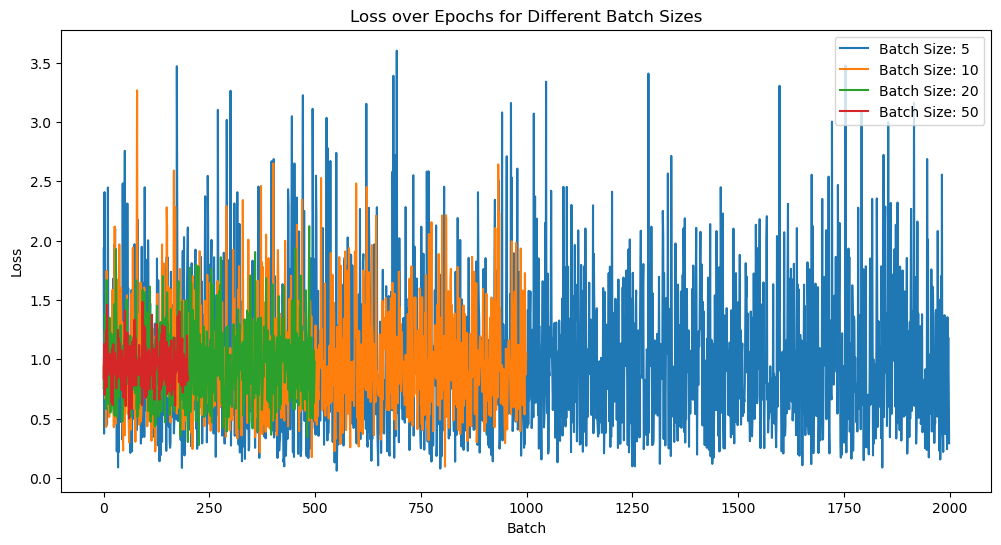

In [33]:
# Plotting Loss
plt.figure(figsize=(12, 6))
for batch_size, losses in loss_history.items():
    plt.plot(losses, label=f'Batch Size: {batch_size}')

plt.title('Loss over Epochs for Different Batch Sizes')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10 for Batch Size: 5
Epoch 1 completed, Average Loss: 0.9812
Epoch 2/10 for Batch Size: 5
Epoch 2 completed, Average Loss: 0.9911
Epoch 3/10 for Batch Size: 5
Epoch 3 completed, Average Loss: 0.9884
Epoch 4/10 for Batch Size: 5
Epoch 4 completed, Average Loss: 0.9891
Epoch 5/10 for Batch Size: 5
Epoch 5 completed, Average Loss: 0.9900
Epoch 6/10 for Batch Size: 5
Epoch 6 completed, Average Loss: 0.9890
Epoch 7/10 for Batch Size: 5
Epoch 7 completed, Average Loss: 0.9901
Epoch 8/10 for Batch Size: 5
Epoch 8 completed, Average Loss: 0.9762
Epoch 9/10 for Batch Size: 5
Epoch 9 completed, Average Loss: 0.9873
Epoch 10/10 for Batch Size: 5
Epoch 10 completed, Average Loss: 0.9911
Epoch 1/10 for Batch Size: 10
Epoch 1 completed, Average Loss: 0.9766
Epoch 2/10 for Batch Size: 10
Epoch 2 completed, Average Loss: 0.9783
Epoch 3/10 for Batch Size: 10
Epoch 3 completed, Average Loss: 0.9722
Epoch 4/10 for Batch Size: 10
Epoch 4 completed, Average Loss: 0.9775
Epoch 5/10 for Batch Size: 1

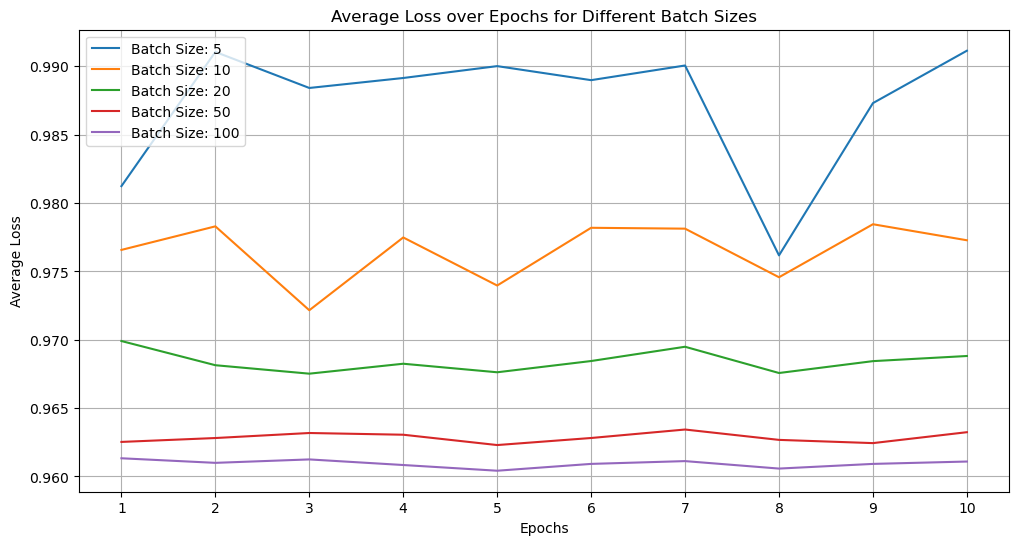

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
epochs = 10
batch_sizes = [5, 10, 20, 50, 100] 
loss_history = {batch_size: [] for batch_size in batch_sizes}

for batch_size in batch_sizes:

    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs} for Batch Size: {batch_size}")

        model.train()
        epoch_loss = 0  # Initialize epoch loss
        num_batches = len(data_loader)  # Get the number of batches

        for batch in data_loader:
            inputs, labels = batch

            predictions = model(inputs)  # Forward pass

            loss = loss_fn(predictions, labels)  # Compute loss

            optimizer.zero_grad()  # Clear old gradients
            loss.backward()  # Compute new gradients
            optimizer.step()  # Update model weights

            epoch_loss += loss.item()  # Accumulate loss

        # Average the loss over the number of batches for this epoch
        average_loss = epoch_loss / num_batches
        loss_history[batch_size].append(average_loss)  # Store the average loss

        print(f"Epoch {epoch+1} completed, Average Loss: {average_loss:.4f}")

print("Training Completed")

# Step 2: Plotting the Loss
plt.figure(figsize=(12, 6))
for batch_size, losses in loss_history.items():
    plt.plot(range(1, epochs + 1), losses, label=f'Batch Size: {batch_size}')

plt.title('Average Loss over Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.xticks(range(1, epochs + 1))  # Ensure all epoch numbers are displayed
plt.legend()
plt.grid()
plt.show()


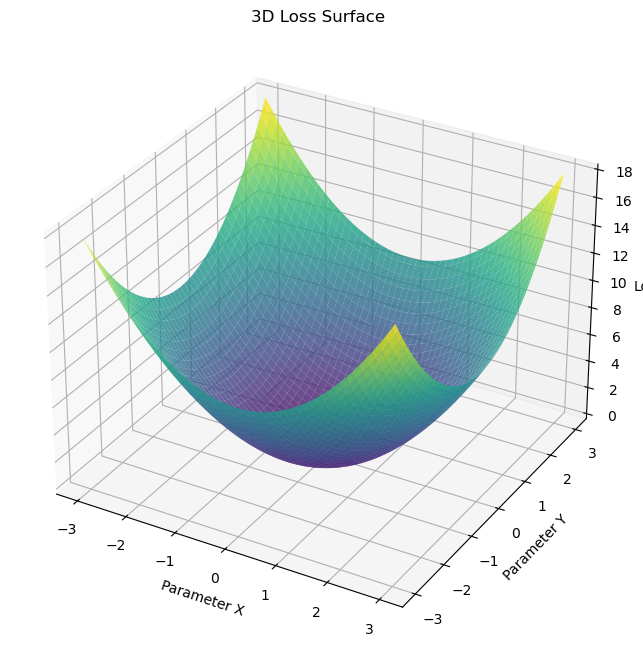

In [35]:
# Assuming the loss surface is a function of two parameters (for example, weight values)
def loss_surface(x, y):
    # This is a placeholder for your loss function, defined over x and y.
    # Replace it with your actual loss function computation.
    return np.square(x) + np.square(y)

# Generate a meshgrid of values for x and y
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = loss_surface(X, Y)

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_title('3D Loss Surface')
ax.set_xlabel('Parameter X')
ax.set_ylabel('Parameter Y')
ax.set_zlabel('Loss')
plt.show()


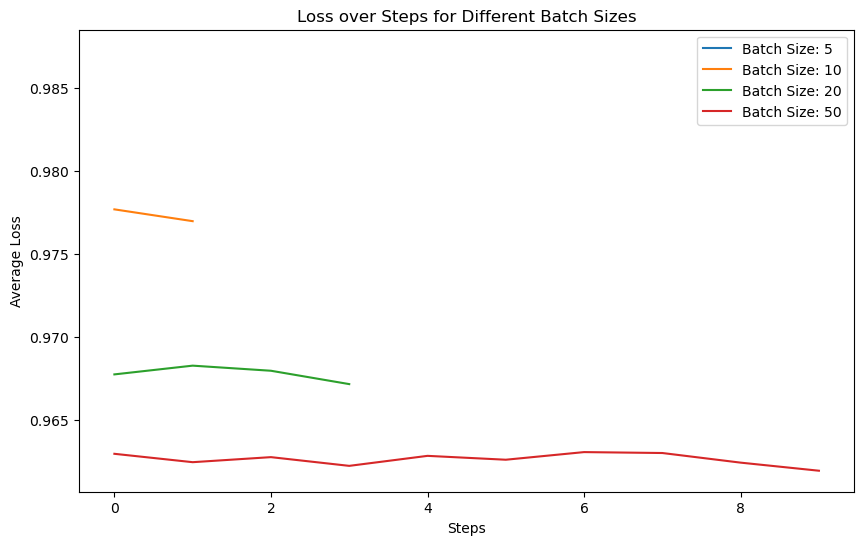

In [36]:
import torch
import matplotlib.pyplot as plt

# Hyperparameters
total_steps = 200
batch_sizes = [5, 10, 20, 50]

loss_history = {batch_size: [] for batch_size in batch_sizes}

for batch_size in batch_sizes:
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    step = 0
    while step < total_steps:
        epoch_loss = 0
        batch_count = 0

        for inputs, labels in data_loader:
            if step >= total_steps:
                break

            predictions = model(inputs)
            loss = loss_fn(predictions, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batch_count += 1
            step += 1

        avg_loss = epoch_loss / batch_count
        loss_history[batch_size].append(avg_loss)

# Plotting
plt.figure(figsize=(10, 6))
for batch_size, losses in loss_history.items():
    plt.plot(range(len(losses)), losses, label=f'Batch Size: {batch_size}')

plt.xlabel('Steps')
plt.ylabel('Average Loss')
plt.title('Loss over Steps for Different Batch Sizes')
plt.legend()
plt.show()

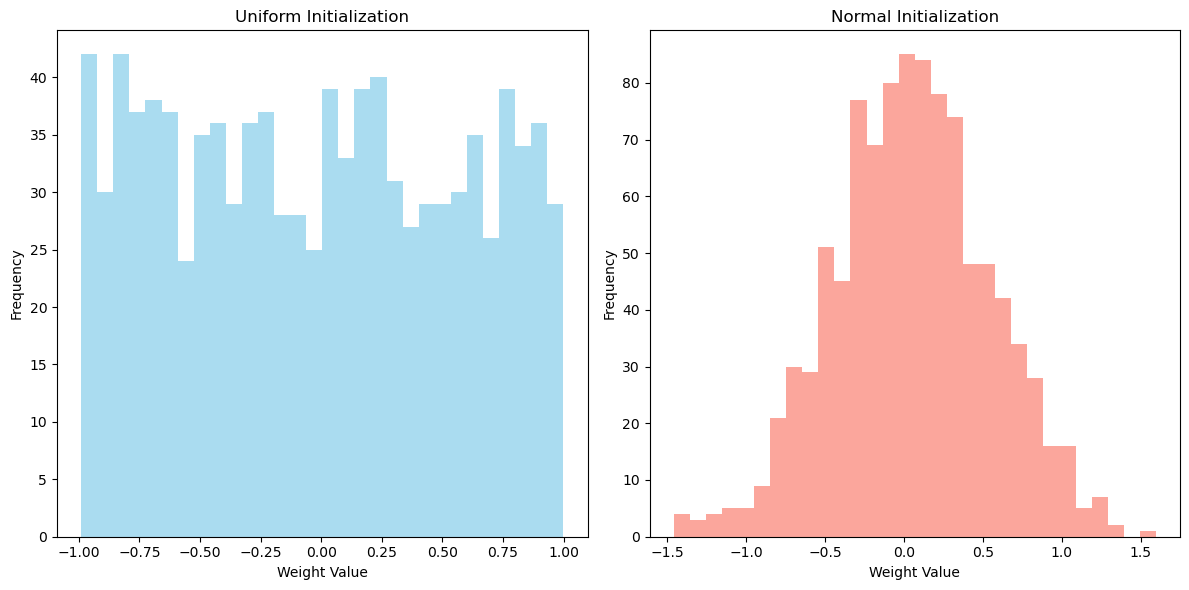

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Uniform Initialization
uniform_samples = np.random.uniform(-1, 1, n_samples)

# Normal Initialization (mean=0, std=0.5)
normal_samples = np.random.normal(0, 0.5, n_samples)

# Create plots
plt.figure(figsize=(12, 6))

# Uniform Distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_samples, bins=30, color='skyblue', alpha=0.7)
plt.title('Uniform Initialization')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

# Normal Distribution
plt.subplot(1, 2, 2)
plt.hist(normal_samples, bins=30, color='salmon', alpha=0.7)
plt.title('Normal Initialization')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


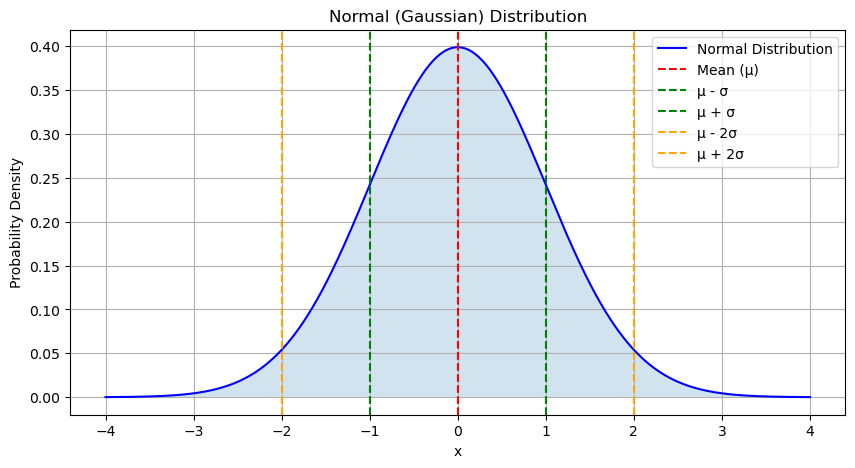

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set parameters
mu = 0       # mean
sigma = 1    # standard deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Normal distribution PDF
pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, pdf, label='Normal Distribution', color='blue')
plt.title('Normal (Gaussian) Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.fill_between(x, pdf, alpha=0.2)
plt.axvline(mu, color='red', linestyle='--', label='Mean (μ)')
plt.axvline(mu - sigma, color='green', linestyle='--', label='μ - σ')
plt.axvline(mu + sigma, color='green', linestyle='--', label='μ + σ')
plt.axvline(mu - 2*sigma, color='orange', linestyle='--', label='μ - 2σ')
plt.axvline(mu + 2*sigma, color='orange', linestyle='--', label='μ + 2σ')
plt.legend()
plt.grid()
plt.show()


In [39]:
import numpy as np

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def forward_pass(X, weights):
    return sigmoid(np.dot(X, weights))

# Backward pass
def backward_pass(X, y, output, weights):
    error = y - output
    delta = error * sigmoid_derivative(output)
    return np.dot(X.T, delta)

# Initialize weights
def initialize_weights(method, input_dim, output_dim):
    if method == 'uniform':
        return np.random.uniform(-1, 1, (input_dim, output_dim))
    elif method == 'xavier':
        return np.random.randn(input_dim, output_dim) * np.sqrt(1. / input_dim)
    elif method == 'he':
        return np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)

# Parameters
np.random.seed(42)  # For reproducibility
X = np.random.rand(10, 3)  # 10 samples, 3 features
y = np.random.rand(10, 1)   # 10 target values

# Testing different initializations
initializations = ['uniform', 'xavier', 'he']
for init in initializations:
    weights = initialize_weights(init, 3, 1)
    output = forward_pass(X, weights)
    gradients = backward_pass(X, y, output, weights)
    
    print(f"Initialization: {init}, Weights: {weights.flatten()[:5]}, Gradients: {gradients.flatten()[:5]}")


Initialization: uniform, Weights: [-0.75592353 -0.00964618 -0.93122296], Gradients: [0.2459012  0.10899996 0.18859202]
Initialization: xavier, Weights: [-0.13247328  0.2247907  -0.73041686], Gradients: [0.18202728 0.0104784  0.13924604]
Initialization: he, Weights: [0.89160795 2.2684831  0.97460275], Gradients: [-0.12283545 -0.17151193 -0.13392484]
